In [34]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score

#### Create a classifier that will predict whether an iris belongs to the 'iris-setosa' class or not.
#### Two classes, 'Iris-setosa' and not 'Iris-setosa'.

### Read the Iris dataset(Iris.csv)

In [35]:
# import the dataset
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
# column 'Id' is not needed for the regression
# drop 'Id'
data.drop('Id', axis=1, inplace=True)

### Encode dependent variable y
-  'Iris-setosa' is encoded as 0
-  'Iris-versicolor'and - 'Iris-virginica' are both encoded as 1.

In [38]:
# check value information in column 'Species'
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [39]:
# 'Iris-setosa' is encoded as 0
# 'Iris-versicolor'and - 'Iris-virginica' are both encoded as 1.
species_nums ={'Species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 1}}
data = data.replace(species_nums)
data['Species'].value_counts()

1    100
0     50
Name: Species, dtype: int64

### Identify independent variables x

<AxesSubplot: >

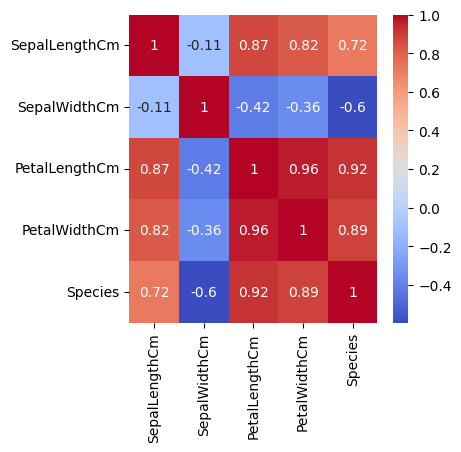

In [40]:
# quick check at variable correlations
# get correlations of each feature in dataset
# use this to define independent and dependent variables
plt.figure(figsize=(4,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

_From above results all four features seem to be quite correlated with 'Species'. However, PetalWidthCm and PetalLengthCm seem to be very much correlated with each other, therefore we can only select one of them. So, we can use 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm' as independent variables_

### 

### Split the data into training and test set

In [41]:
# from above, assign variables x and y
x = data.iloc[:, [0, 1, 2]].values
y = data.iloc[:, 4].values

x = x.reshape(-1, x.shape[1])
x = preprocessing.scale(x)

# split training and test set
# since y value has all 0 values together and 1 values together
# random_state is used to make selected training and test data more representive
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
print ("Training data:",x_train.shape, y_train.shape)
print ("Test data:",x_test.shape, y_test.shape)


Training data: (112, 3) (112,)
Test data: (38, 3) (38,)


### Use logistic regression to fit a model and make predictions on the test set

In [42]:
# fit logistic model
logr = LogisticRegression()
logr.fit(x_train, y_train)

# make predictions on the test data
y_pred = logr.predict(x_test).reshape(-1,1)

### Obtain a confusion matrix comparing the predictions to the gold labels

In [43]:
from sklearn.metrics import confusion_matrix

classes = ['Iris-setosa', 'non-Iris-setosa']
conf_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
cm_df


,Iris-setosa,non-Iris-setosa
Iris-setosa,15,0
non-Iris-setosa,0,23


### Examine the confusion matrix and predict in a comment whether the model is likely to have higher precision, higher recall, or similar precision and recall.

_'Iris-setosa' is the positive class and 'non-Iris-setosa' is the negative class. From the confusion matrix, it seems that True Positive(TP, predict positive and its true) and True Negative(TN, predict negative and its true) are 15 and 23 respectively. No False Positive(FP, predict positive and it's false) and False Negative(FN, predict negative and it's false) were predicted. This means the model is likely to have high precision, high recall._

### Write code to calculate accuracy, precision, recall, and check whether prediction was corect

In [44]:
# accuracy of the model
c_accuracy = (15+23)/(15+0+0+23)
m_accuracy = logr.score(x_test, y_test)
print(f'Calculated accuracy is {c_accuracy}, and model accuracy is {m_accuracy}.')

# precision of the model
c_precision = 15/(15+0)
m_precision = precision_score(y_test == 0, y_pred == 0)
print(f'Calculated precision is {c_precision}, and model precision is {m_precision}.')

# recall of the model
c_recall = 15/(15+0)
m_recall = recall_score(y_test == 0, y_pred == 0)
print(f'Calculated recall is {c_recall}, and model recall is {m_recall}.')



Calculated accuracy is 1.0, and model accuracy is 1.0.
Calculated precision is 1.0, and model precision is 1.0.
Calculated recall is 1.0, and model recall is 1.0.
